# Regressão Linear

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
idade=[18,25,57,45,26,64,37,40,24,33]
salarioanual=[15000,29000,68000,52000,32000,80000,41000,45000,26000,33000]

xData = np.array(idade)
yData = np.array(salarioanual)

In [4]:
def equacaolinear(x,a,b):
    return a*x + b

In [5]:
parametrosiniciais = np.array([1.0,1.0])

In [6]:
parametrosotimizados, pcov = curve_fit(equacaolinear,xData,yData,parametrosiniciais)

In [7]:
previsaomodelo = equacaolinear(xData,*parametrosotimizados)

In [8]:
erroabsoluto = previsaomodelo - yData

In [12]:
SE = np.square(erroabsoluto)
MSE = np.mean(SE)

print('SE: ', SE)
print('MSE: ', MSE)

SE:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE:  5479238.909036714


In [13]:
Rsquared = 1.0 - (np.var(erroabsoluto)/np.var(yData))
print('Coeficiente de Determinação: ', Rsquared)

Coeficiente de Determinação:  0.9846300347582353


In [14]:
print('Y={}X {}'.format(parametrosotimizados[0],parametrosotimizados[1]))

Y=1320.5325666669085X -6627.651716729711


Text(0, 0.5, 'Salario Anual(R$)')

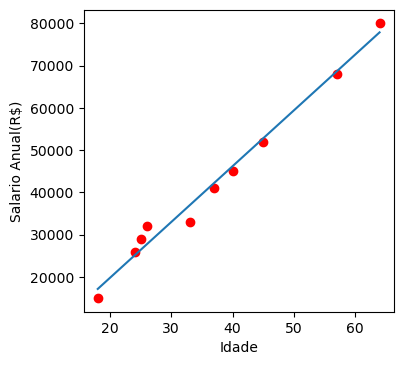

In [16]:
f = plt.figure(figsize=(4,4),dpi=100)
axes = f.add_subplot(111)

axes.plot(xData, yData,'ro')

xModel = np.linspace(min(xData),max(xData))
yModel = equacaolinear(xModel, *parametrosotimizados)

axes.plot(xModel,yModel)
plt.xlabel('Idade')
plt.ylabel('Salario Anual(R$)')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
reg = LinearRegression()
x_ModeloSklearn=xData.reshape((-1,1))
regression = reg.fit(x_ModeloSklearn,yData)

In [19]:
previsao = reg.predict(x_ModeloSklearn)

In [21]:
MSE = mean_squared_error(yData,previsao)
print('MSE :',MSE)

MSE : 5479238.909036713


In [22]:
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score

R_2 = r2_score(yData,previsao)

print('Coeficiente de Determinação (R2):', R_2)

Y = [1320.53256496]X -6627.651646877632
Coeficiente de Determinação (R2): 0.9846300347582353


#### NOVOS DADOS

In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [25]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

In [26]:
reg=LinearRegression()
x_Reshaped=x.reshape((-1,1))
regressao = reg.fit(x_Reshaped,y)

In [27]:
previsao = reg.predict(x_Reshaped)

In [30]:
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y,previsao)

print('Coeficiente de Determinação (R2):', R_2)

Y = [0.26342934]X 325.5734210494428
Coeficiente de Determinação (R2): 0.639311719957


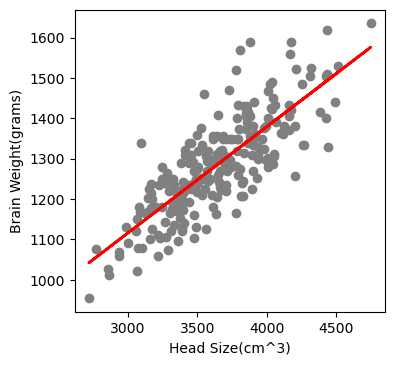

In [31]:
plt.figure(figsize=(4,4),dpi=100)
plt.scatter(x,y, color='gray')
plt.plot(x,previsao,color='red',linewidth=2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()